## Introducción

En este Jupyter Notebook vamos a graficar el IPC subyacente mensual calculado por el INE. Para ello habremos de descargar los datos oficiales y guardarlos en csv.

Con estos datos podremos calcular la pérdida de poder adquisitvo de nuestros ahorros en un periodo de tiempo. 


### Descargar datos

Los datos están alojados en [IPC INE](https://ine.es/consul/serie.do?d=true&s=IPC253989&c=2&) y se pueden descargar tanto en formato excel como en csv. Nosotros los hemos descargado y puesto en el mismo directorio que el Jupyter notebook de manera que la carga sea directa. El archivo se llama series1352900838sc.csv y lo tenéis disponible en este repositorio.

La descarga se podría automatizar si vamos a usar estos datos como parte de un proceso de inversión.

<span style="color:red">Importante</span>: si los datos los vais a descargar en formato csv usad separación por punto y coma (;) ya que los decimales está condificados con una coma (,) y esto puede dar problemas de lectura.

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

ipc_df = pd.read_csv('series1352900838sc.csv ', sep=';')
ipc_df.head(10)

,Variable1,Valor1,Variable2,Valor2,Variable3,Valor3,PERIODO,VALOR
0,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2023M04,"1,0"
1,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2023M03,"0,7"
2,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2023M02,"0,7"
3,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2023M01,"-0,2"
4,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M12,"0,9"
5,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M11,"0,7"
6,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M10,"1,0"
7,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M09,"0,2"
8,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M08,"0,4"
9,Tipo de dato,Variación mensual,Grupos especiales 2001,General sin alimentos no elaborados ni product...,Total Nacional,Total Nacional,2022M07,"-0,3"


### Nos quedamos con las dos últimas variables  y pasamos VALOR a float

In [17]:
ipc_df = ipc_df[['PERIODO', 'VALOR']]
ipc_df.VALOR = ipc_df.VALOR.apply(lambda x: float(x.replace(',','.')))
ipc_df.dtypes

PERIODO     object
VALOR      float64
dtype: object

### Pasamos el índice del dataframe a datetime

In [18]:
fechas = ipc_df.PERIODO.apply(lambda x: x.split('M'))
ipc_df.index = [pd.datetime(int(f[0]), int(f[1]), 1) for f in fechas]
ipc_df.rename(columns = {'VALOR':'IPC Core MoM (%)'}, inplace=True)
ipc_df.drop(columns = 'PERIODO', inplace = True)
ipc_df.head(10)

,IPC Core MoM (%)
2023-04-01,1.0
2023-03-01,0.7
2023-02-01,0.7
2023-01-01,-0.2
2022-12-01,0.9
2022-11-01,0.7
2022-10-01,1.0
2022-09-01,0.2
2022-08-01,0.4
2022-07-01,-0.3


### Graficamos todo el histórico

Recordad que España empezó a acuñar Euros (€) en 1999 y no fue hasta 2002 que se introdujo como moneda única.

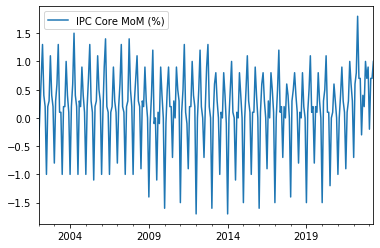

In [19]:
ipc_df.plot()

### Graficamos los últimos 4 años

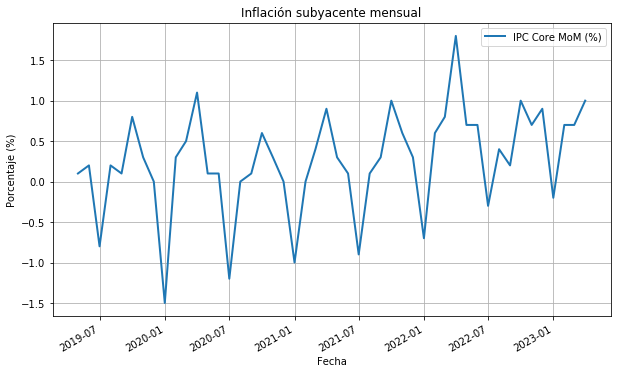

In [41]:
n = 4 # Número de años
ipc_df_ = ipc_df.iloc[:12*n]

plt.figure(figsize=(10, 6))
fechas = [datetime.strptime(str(ax), '%Y-%m-%d %H:%M:%S') for ax in ipc_df_.index]
plt.plot(fechas, ipc_df_['IPC Core MoM (%)'].values, label='IPC Core MoM (%)', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.title('Inflación subyacente mensual')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.savefig('ipc_core_mom.png', format='png', dpi = 500)
plt.show()

### ¿Cuánto ganaríamos si nuestros ahorros rindiesen al ritmo de la inflación mensual? 

Hagámoslo para los 20 años anteriores.

In [31]:
n = 20 # Número de años
ahorros = 15000 # (€)
tasa_crecimiento_n = np.prod((1 + ipc_df.iloc[:12*n] / 100)).values[0]
ahorros * tasa_crecimiento_n

21570.516749759707

### ¡OJO! ¡CUIDADO! Esto es un pérdida de casi un 44% en 20 años

Para calcular la tasa de crecimiento anual habríamos de resolver: ahorros * ((1 + tasa_anual / 100) ** 20) = ahorros * tasa_crecimiento_n

In [32]:
tasa_anual = (tasa_crecimiento_n ** (1 / 20) -1) *100
tasa_anual

1.8329827053564784

### Resulta una tasa anualiza de 1.83%

Esto significa que nuestros ahorros habrían debido de rendir desde hace 20 años un 1.83% cada año para no perder poder adquisitivo. 

### Grafiquemos la pérdida de poder adquisitivo

In [33]:
ahorros = 15000
tasa_perdida_anual = 1.83 # (%)
rango = 20 # En años
acumulado_anual = [ahorros * (1 - 1.83/100) ** n for n in range(rango)]

### Creamos Pandas DataFrame por comodidad y graficamos

In [36]:
acumulado_anual_df = pd.DataFrame(acumulado_anual, index=[pd.datetime(a, 1, 1) for a in range(2024-rango, 2024)], columns = ['Pérdida poder adquisitivo (€)'])

No handles with labels found to put in legend.


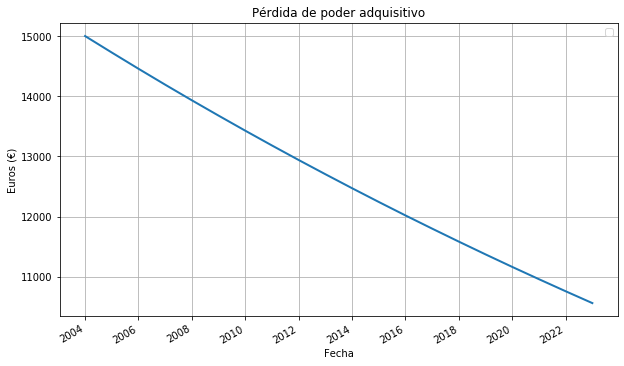

In [40]:
plt.figure(figsize=(10, 6))
fechas = [datetime.strptime(str(ax), '%Y-%m-%d %H:%M:%S') for ax in acumulado_anual_df.index]
plt.plot(fechas, acumulado_anual_df['Pérdida poder adquisitivo (€)'].values, linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Euros (€)')
plt.title('Pérdida de poder adquisitivo por inflación')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.savefig('perdida_poder.png', format='png', dpi = 500)
plt.show()